In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

## K-mer occurrence probability

In [3]:
alphabet_size = 4
def distinct_kmer_count(k):
    return alphabet_size**k

def vanilla_kmer_occ_prob(k, bin_size):
    return min(1.0, bin_size / distinct_kmer_count(k))

def recursive_kmer_hit_placement_count(seq_len, k, kmer_hits):
    if (seq_len - k * kmer_hits < 0):
        return 0
    elif (kmer_hits > 1):
        count = 0
        for free_positions in range(k * (kmer_hits - 1), seq_len - k + 1):
            count += recursive_kmer_hit_placement_count(free_positions, k, kmer_hits - 1)
        return count
    else:
        return seq_len - k + 1

def kmer_hit_placement_count(seq_len, k, kmer_hits):
    if (kmer_hits == 0):
        return 0
    elif (kmer_hits == 1):
        return seq_len - k + 1
    else:
        count_table = []
        for h in range(1, kmer_hits + 1):
            row = []
            for l in range(1, seq_len + 1):
                if (l < k * h):
                    row.append(0)
                elif (h == 1):
                    row.append(l - k + 1)
                else:
                    #print(str(h) + "\t" + str(l) + "\t" + str(k * (h - 1) - 1))
                    #print(count_table[-1][k * (h - 1) - 1:l - k])
                    row.append(sum(count_table[-1][k * (h - 1) - 1:l - k]))
            
            count_table.append(row)

    #for row in count_table:
    #    print(row)
    return count_table[kmer_hits - 1][seq_len - 1]
        
def distinct_seq_count(seq_len, k, kmer_hits):
    free_positions = seq_len - k * kmer_hits
    return alphabet_size**free_positions

def swenja_kmer_occ_prob(k, bin_size):
    kmer_prob_numerator = 0
    max_hits = bin_size // k
    
    for kmer_hits in range(1, max_hits + 1, 1):
        # combinations among n+1 kmer hits
        comb_multiplier = max(1, math.comb(kmer_hits, kmer_hits - 1) - 1)
        # Set the position of the k-mers in the bin
        # ATCxxxATCxxx
        # Find the number of distinct sequences with this placement of k-mer hits
        dist_seq_count = distinct_seq_count(bin_size, k, kmer_hits)
        # Find all possible placements of k-mer hits
        # ATCATCxxxxxx
        # ATCxATCxxxxx
        # .
        # .
        # .
        # xxxxxxATCATC
        kmer_hit_placements = kmer_hit_placement_count(bin_size, k, kmer_hits) 

        #print("comb_multiplier\t" + str(comb_multiplier) )
        #print("dist_seq_count\t" + str(dist_seq_count) )
        #print("kmer_hit_placements\t" + str(kmer_hit_placements))
        
        ith_union = comb_multiplier * dist_seq_count * kmer_hit_placements

        #print(ith_union)
        if (kmer_hits % 2 == 0):
            kmer_prob_numerator -= ith_union
        else: 
            kmer_prob_numerator += ith_union

        #print(kmer_prob_numerator)
        
    #print(str(max_kmers) + "\t" + str(bin_size) + "\t" + str(kmer_occ_prob))
    return kmer_prob_numerator / alphabet_size**bin_size

def recursive_swenja_kmer_occ_prob(k, bin_size):
    kmer_prob_numerator = 0
    max_hits = bin_size // k
    
    for kmer_hits in range(1, max_hits + 1, 1):
        # combinations among n+1 kmer hits
        comb_multiplier = max(1, math.comb(kmer_hits, kmer_hits - 1) - 1)
        # Set the position of the k-mers in the bin
        # ATCxxxATCxxx
        # Find the number of distinct sequences with this placement of k-mer hits
        dist_seq_count = distinct_seq_count(bin_size, k, kmer_hits)
        # Find all possible placements of k-mer hits
        # ATCATCxxxxxx
        # ATCxATCxxxxx
        # .
        # .
        # .
        # xxxxxxATCATC
        kmer_hit_placements = recursive_kmer_hit_placement_count(bin_size, k, kmer_hits) 

        #print("comb_multiplier\t" + str(comb_multiplier) )
        #print("dist_seq_count\t" + str(dist_seq_count) )
        #print("kmer_hit_placements\t" + str(kmer_hit_placements))
        
        ith_union = comb_multiplier * dist_seq_count * kmer_hit_placements

        #print(ith_union)
        if (kmer_hits % 2 == 0):
            kmer_prob_numerator -= ith_union
        else: 
            kmer_prob_numerator += ith_union

        #print(kmer_prob_numerator)
        
    #print(str(max_kmers) + "\t" + str(bin_size) + "\t" + str(kmer_occ_prob))
    return kmer_prob_numerator / alphabet_size**bin_size

In [4]:
%%time
print(recursive_swenja_kmer_occ_prob(4, 20))

0.06503732083729119
CPU times: user 514 µs, sys: 8 µs, total: 522 µs
Wall time: 507 µs


In [5]:
%%time
print(swenja_kmer_occ_prob(4, 50))

0.17037931242810453
CPU times: user 3.8 ms, sys: 0 ns, total: 3.8 ms
Wall time: 3.79 ms


In [6]:
%%time
print(vanilla_kmer_occ_prob(4, 100))

0.390625
CPU times: user 28 µs, sys: 18 µs, total: 46 µs
Wall time: 48.2 µs


In [ ]:
#https://stackoverflow.com/questions/6790620/probability-of-3-character-string-appearing-in-a-randomly-generated-password
bin_size = 20
vanilla_p = []
swenja_p = []
k = 11
for i in range(10):
    vanilla_p.append(vanilla_kmer_occ_prob(k, bin_size))
    swenja_p.append(swenja_kmer_occ_prob(k, bin_size))
    bin_size += 1024

In [ ]:
vanilla_p

In [57]:
swenja_p

[0.0002416991972240955,
 0.0004856633948665042,
 0.0007295083832619945,
 0.0009732341624105668,
 0.0012168407323122207,
 0.0014603280929669565,
 0.0017036962443747739,
 0.0019469451865356732,
 0.002190074919449654,
 0.0024330854431167167]

## Objective function

In [15]:
err_list = [0, 3, 2, 4, 5]

def find_FPR(pattern_p):
    none_match_p = (1 - pattern_p)**patterns_per_segment
    return min(1 - none_match_p, 1)


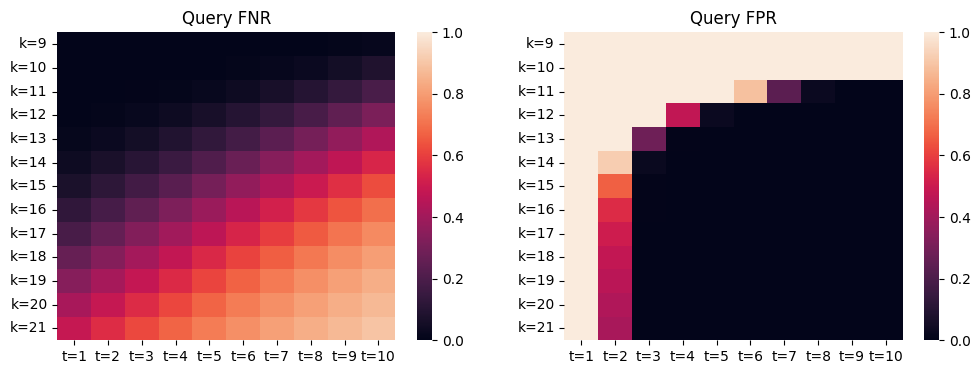

In [38]:
er = 4

fig, axs = plt.subplots(1,2)
fig.set_size_inches(12, 4)
#fig.suptitle('Query k-mer thresholds')

fnr_df = pd.read_csv('fnr_' + str(er) + '.tsv', sep='\t', index_col=0)
fnr_df = fnr_df.iloc[:, :-1]    

sns.heatmap(fnr_df, ax = axs[0], vmin=0, vmax=1)
axs[0].set_title("Query FNR")

# these are the false positive probabilities of a pattern appearing in a reference bin
pattern_fp_df = pd.read_csv('fpr_' + str(er) + '.tsv', sep='\t', index_col=0)
pattern_fp_df = pattern_fp_df.iloc[:, :-1]    

# recreation of FPR calculation in filtering_request.hpp
query_len = 100000000
query_seg_count = 10000
pattern = 50
query_every = 2
patterns_per_segment = (query_len / query_seg_count - pattern + 1) / query_every  

fpr_df = pattern_fp_df.map(find_FPR)

sns.heatmap(fpr_df, ax = axs[1], vmin=0, vmax=1)    
axs[1].set_title("Query FPR")

fig.savefig('100Mb.4e.50l.heatmap.png', dpi=400, bbox_inches='tight')
plt.show()